#Introduction
The goal of this notebook is to solve two examples of linear regression. The first with only one feature and the second with more than one feature, a simple example of a multidimensional case with two features. The notebook follows exercises proposed in the Standford Coursera course by Andrew Ng, but I comment, with my explanations, on many points that I think are relevant for the understanding of the concepts as well as the Python implementation. 

The cost function for this model, namely the linear regression (a special case of the more general class of Generalized linear models) will be given by the mean squared error function
$$J(\theta) = \frac{1}{2} \sum_{i=1}^m \left( h^{(i)} - y^{(i)} \right)^2 = \frac{1}{2} \sum_{i=1}^m J(\theta;x^{(i)}) ,$$
where $m$ is the total number of training examples and $h$ is the hypothesis function considered to be the linear combination $ h= h(\theta; x^{(i)}) = \theta^t x^{(i)} $ with $\theta$ the column vector representing the weights and bias of the model and $x^{(i)}$ the i-th column vector with the features of the model. In particular, for a total of $n$-features, $x^{(i)} \in \mathbb{R}^{n+1}$, because we include an extra element $x_0=1$ that is associated with the bias $\theta_0$. The main purpose of the cost or loss function is to be minimized with respect to a parameter $\theta$ in order to make sure that the hypothesis converges to the values of the targets $y^{(i)}$, which are single scalar values. A column vector $y \in \mathbb{R}^{m}$ can accommodate all the $m$ target values from each training example $(x^{(i)}, y^{(i)} )$. Note that the notation $J(\theta; x)$ tries to distinguish the role of $\theta$ from the role of $x$: while $x$ are fixed for each training example, $\theta$ are the coefficients to be learned by the model. Finally, capital $X$ will denote the design matrix, which is made of rows $(x^t)^{(i)}$. Thus, $X \in \mathbb{R}^{(m, n+1)}$ and $\theta \in  \mathbb{R}^{(n+1, 1)}$  is a matrix.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
   
#line magic function for plot inside notebook
%matplotlib inline       
import seaborn as sns
#from numpy.core.function_base import linspace



# Single variable Linear Regression
"In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.The dataset for our linear regression problem is as follows: The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)" (extract from Stanford-ML-ex01- Andrew Ng)

In [2]:
path = '/content/drive/MyDrive/Machine_Learning_DS/Material/ML_Standford/ex1-octave/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

m = len(data)  #number of training values
x = np.array(data['Population'])   #capital X will be with x0s included...
y = np.array(data['Profit'])

data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
print(len(data.columns))
print(len(data.index))

2
97


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
x.shape



(97,)

In [6]:
x = np.array(data['Population']).reshape(m,1)
y = np.array(data['Profit']).reshape(m,1)



x.shape


(97, 1)

#To visualize the data
Note that 'bx' stands for blue crosses (option) , a marker

Text(0.5, 1.0, 'Population Vs Profit')

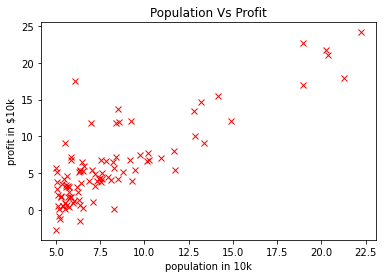

In [7]:
plt.plot(data['Population'], data['Profit'], 'rx'  )   #plt.plot(x, y, 'rx'  )
#plt.figure() # not necessary 
plt.xlabel('population in 10k')
plt.ylabel('profit in $10k')
plt.title('Population Vs Profit')

#Cost function

Given my hypothesis function, consider the cost function
to be the quadratic cost function, which is a convex function
and works well with gradient descent.
Vectorization is the best way to go because it avoids using loops...

Recall:  $J(\theta) =  \frac{1}{2m} (X \theta - y)^T (X \theta - y)$
where X includes the $x_0=1$ related to the bias $\theta_0$

Obs: numpy.append(arr, values, axis=None)
Append values to the end of an array.

In [8]:
X = np.append(np.ones((m,1)), x,  axis=1 )  #0 would be along the lines. axis=1 will add x as the next column after a column of ones
X.shape

(97, 2)

In [9]:
def cost_function(X, y, theta):
    """Calculate the cost function for the linear regression of a single variable """
    global m    #or define m again here locally
    return 1/(2*m) * ((np.dot(X,theta)) - y).T @ ( np.dot(X,theta) - y)
   # return 1/(2*m) * ((X @ theta) - y).T @ ((X @ theta) - y) #alternatively: sum(np.square( (X@ theta) - y  ))

In [10]:
theta_initial = np.zeros( (2,1) ) 
print(cost_function(X, y, theta_initial))

[[32.07273388]]


In [11]:
#NOTE these
print ((np.dot(X, theta_initial)).shape)
print ((np.dot(X, theta_initial).T).shape)

(X @ theta_initial).shape

(97, 1)
(1, 97)


(97, 1)

#Gradient descent
As you want to minimize a cost function, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the matrix $\theta$

In [12]:
def gradientdescent(X, y, theta, alpha, itera):
  """Gradient to update weights theta. It returns theta and the cost function at each iteration step """

  m = len(y) #number of training examples
  J_history = np.zeros((itera,1)) 
  for i in range(itera):
    theta = theta - (alpha/m) * (X.T @ (np.dot(X,theta) - y )) #vectorized
    J_history[i] = cost_function(X, y, theta)  #store J value after updating theta and repeat process

    #alternative: theta[0] = theta[0] - ...(np.sum(X@theta - y) * 1 ) #since x0 =1
    # theta[1] = theta[1] - ....(np.sum(X@theta - y).T @ X[:,1:])
    #note that:  X[:,1:] is (97,1)  and  X[:,1] is (97,)
    #

  return theta, J_history

theta = np.zeros( (2,1) )
alpha = 0.02
itera = 1500  # TRY 3500 and see better value

theta, J_history = gradientdescent(X, y, theta, alpha, itera)
print(theta)
z = pd.DataFrame(J_history, columns=['J values']) 
z.head()


[[-3.87813769]
 [ 1.19126119]]


,J values
0,16.769642
1,10.407580
2,7.759183
3,6.653288
4,6.188106


#Plotting results and making a prediction

Your final values for θ will also be used to make predictions on profits in
areas of 35,000 and 70,000 people.

In [13]:
predict1 = np.array([1, 3.5]).dot(theta)*10000 #data is given in 10k people and 10k money
predict2 = np.dot(np.array([1, 7]), theta)*10000 #same for 7 = 70k
print(predict1)
print(predict2)

[2912.76490368]
[44606.90671602]


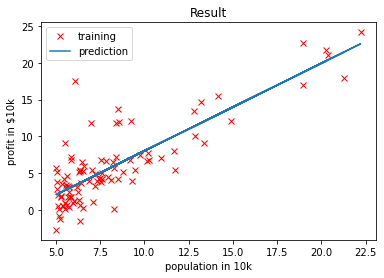

In [14]:
plt.figure()
plt.plot(X[:,1], y, 'rx', label='training' )
plt.plot(X[:,1], np.dot(X,theta), label='prediction' )
plt.xlabel('population in 10k')
plt.ylabel('profit in $10k')
plt.title('Result')
plt.legend()
#plt.show()

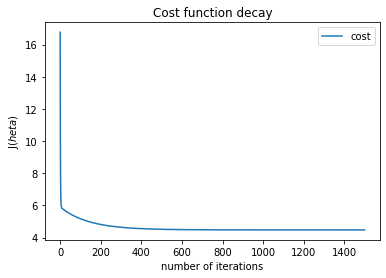

In [15]:
#The cost function against the number of iterations below
plt.plot(J_history, label='cost')
plt.xlabel('number of iterations')
plt.ylabel('J($ \theta $)')
plt.title('Cost function decay')
plt.legend()

In [16]:
#now contour plot (surface levels) and surface plot

theta0vals = np.linspace(-10,10,100)
theta1vals = np.linspace(-1,4,100)

J_values =  np.zeros((len(theta0vals), len(theta1vals)))

for i in range(len(theta0vals)):
  for j in range(len(theta1vals)):
    #t = np.array([ [theta0vals[i]], [theta1vals[j]] ])
     t = [[theta0vals[i]],[theta1vals[j]]]
     J_values[i,j] = cost_function(X,y,t)

J_values.shape
#J_values

(100, 100)

Text(0.5, 1.0, 'A contour plot for bias theta')

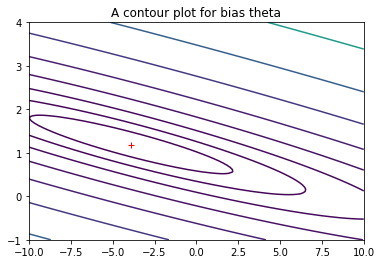

In [17]:
# J_values.T (transpose) is required for the way contour plot works. why?
scaling = np.logspace(-2,3,20)
plt.contour(theta0vals, theta1vals, J_values.T, levels = np.logspace(np.log10(0.01),np.log10(1000), 20))
plt.plot(theta[0], theta[1], 'r+')
plt.title('A contour plot for bias theta')

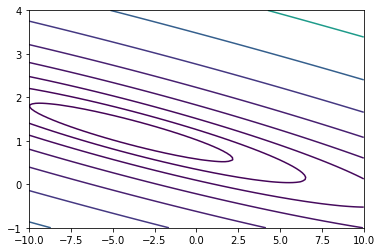

(100, 100)


array([[328.09290555, 323.26504192, 318.47799046, ...,  49.81156018,
         48.94247627,  48.11420452],
       [316.6648683 , 311.92025945, 307.21646275, ...,  46.45923561,
         45.67340647,  44.9283895 ],
       [305.44447299, 300.7831189 , 296.16257698, ...,  43.31455298,
         42.61197861,  41.95021641],
       ...,
       [186.35412584, 189.60197489, 192.89063611, ..., 691.41691065,
        698.62353943, 705.87098036],
       [195.06735595, 198.39845977, 201.77037576, ..., 708.20585345,
        715.49573699, 722.82643269],
       [203.98822799, 207.40258658, 210.85775734, ..., 725.20243817,
        732.57557648, 739.98952696]])

In [18]:
#alternatively                      

J_matrix = np.array([np.array([cost_function(X,y, [[theta0vals[i]],[theta1vals[j]]]).reshape(1) 
                                                                for i in range(len(theta0vals))]).reshape(100) 
                                                                      for j in range(len(theta1vals))])

#now the matrix needs no transposing this time.. why?
plt.contour(theta0vals, theta1vals, J_matrix, levels = np.logspace(np.log10(0.01),np.log10(1000), 20)  )
plt.show()
print(J_matrix.shape)
J_matrix

In [19]:
#Note the role of first and second components i,j in regard to row and colum
A = [1,2,3,4]
B= [1,2,3]
M = np.array([[(a,b) for a in A] for b in B])
print(M.shape)
M.tolist() #removes third dimension. 3 rows(b) and 4 columns(a)

(3, 4, 2)


[[[1, 1], [2, 1], [3, 1], [4, 1]],
 [[1, 2], [2, 2], [3, 2], [4, 2]],
 [[1, 3], [2, 3], [3, 3], [4, 3]]]

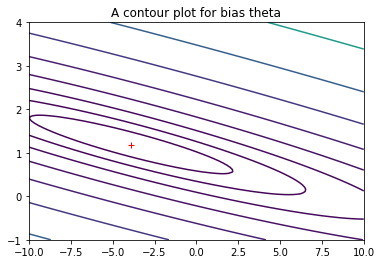

In [20]:
#Another way using numpy meshgrid
theta0vals = np.linspace(-10,10,100)
theta1vals = np.linspace(-1,4,100)  

def f(theta0vals, theta1vals):
  
  Z = np.zeros((len(theta0vals), len(theta1vals)))

  for (i, value0) in enumerate(U):
    for (j, value1 ) in enumerate(V):
      t = [[value0[i]],[value1[j]]]
      Z[i,j] = 1/(2*m) * ((np.dot(X,t)) - y).T @ ( np.dot(X,t) - y)
  return Z.T
#Take transpose as contour plot flips directions

U, V = np.meshgrid(theta0vals, theta1vals)

plt.contour(U,V, f(U,V), levels = np.logspace(np.log10(0.01),np.log10(1000), 20))
plt.plot(theta[0], theta[1], 'r+')
plt.title('A contour plot for bias theta')
plt.show()


#Basic Linear Algebra/Statistics
For one feature, the relation between the parameter and the intercept is straightforward and can be easily checked against the covariance matrix and mean values.

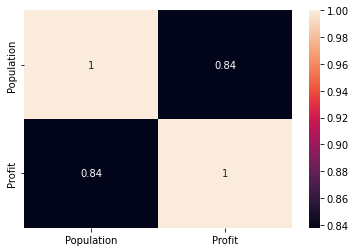

In [21]:
#The linear relation, measured by correlation, between the the feature and the target is clear
#in the following picture
sns.heatmap(data.corr(), annot=True)

In [22]:
data.cov()

,Population,Profit
Population,14.975999,17.86687
Profit,17.866870,30.36299


In [23]:
data.Population.var()

14.975998519375002

In [24]:
#1 feature: theta1 = cov(x,y)/var(x)
expected_theta1 = 17.86687/ data.Population.var()
expected_theta1

1.193033638250229

In [25]:
#Thinking of vectors and subspaces, the first parameter is also given as
float((X[:,1]-X[:,1].mean()).T @ y)/( (X[:,1]-X[:,1].mean()).T   @ (X[:,1]-X[:,1].mean())) 

1.1930336441895941

In [26]:
data.mean()

Population    8.159800
Profit        5.839135
dtype: float64

In [27]:
#1 feature: theta0 = mean(y) - theta1 * mean(x)
expected_theta0 = data.Profit.mean() - (17.86687/ data.Population.var())*(data.Population.mean())
expected_theta0


-3.8957808298478307

In [28]:
data.Population.std() * data.Profit.std()

21.324073135832304

In [29]:
data.corr()*(data.Population.std() * data.Profit.std()) #covariance of x and y off-diagonal

,Population,Profit
Population,21.324073,17.866870
Profit,17.866870,21.324073


#Linear Regression with multiple variables

"In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house." (extract from Stanford-ML-ex01- Andrew Ng)

In [30]:
path = '/content/drive/MyDrive/Machine_Learning_DS/Material/ML_Standford/ex1-octave/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

m = len(data['Price'])  #number of training values

#make sure to create a matrix 
features = [ 'Size','Bedrooms']

x = np.array( [ data['Size'], data['Bedrooms'] ] )   #capital X will be with x0s included...
y = np.array(data['Price'])

m = len(data)

data.head(7)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [32]:
data.describe()  #5-point description

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [33]:
#The examples with 5 bedrooms are scarce and will not give much information
#that is the same case for those with only 1 bedroom (check)
data[data['Bedrooms'] >=5 ]['Bedrooms'].count()

1

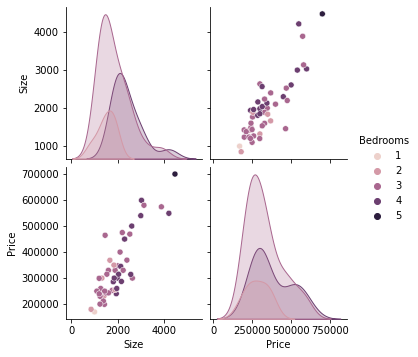

In [34]:
#The visible linear dependence of price and Size can be seen below
#note the behaviour of examples with 3 and 4 bedrooms
sns.pairplot(data, hue= 'Bedrooms' , diag_kind='kde')

In [35]:
#the data size has 2 features , 1 target and 47 examples
print(data.shape)
print(x.shape)
print(y.shape)

(47, 3)
(2, 47)
(47,)


In [36]:
#but the shapes are not as we want at the moment
x = x.T   #transpose (ONCE!) to make examples along rows
(m,n) = x.shape
print(m,n)

47 2


In [37]:
x[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [38]:
#Reshape such that we have column vectors and matrices
#x was corrected with transpose but make sure all formates are fixed as follows

x = x.reshape(m,n)
y = y.reshape(m,1)

print(x.shape)
print(y.shape)

(47, 2)
(47, 1)


In [39]:
x[1]

array([1600,    3])

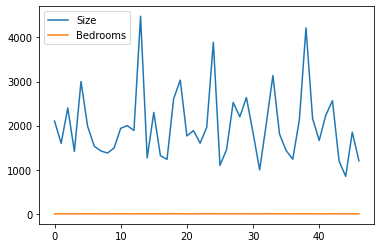

In [40]:
#Look at this plot below. The orders of magnitude of Size are larger than 
#the orders of magnitude in Bedrooms. In fact, Sizes are of order 10^3 and Bedrooms only 10^0.
features = ['Size','Bedrooms']
data[features].plot()

#Standard deviation and normalization
Before we normalize the features, note that Pandas standard deviation is different from Numpy std(). The reason is that Pandas will use the corrected version (Bessel's correction), where the mean value is a data estimation of the true mean value, while Numpy considers the uncorrected standard deviation. That is, Pandas assumes that the mean/expectation_value is calculated from a sample only. Numpy considers it is calculated from a population. These two concepts are different in statistics, because the sample is, generally, data coming from the population, a subset of all the data!

Specifically, let $N$ be the number of examples observed, these two quantities differ by

$$  \sigma_{\textrm{sample}} = \sqrt{ \left( \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2   \right) },$$

$$ \sigma_{\textrm{population}} =  \sqrt{ \left( \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2   \right) },$$
where we understand the true mean value as $\mu$ and the mean value $\bar{x}$ from the dataset (subset of a population) is a data estimation of the true mean. Note that $\sigma_{\textrm{sample}} \geq \sigma_{\textrm{population}}$.

If we tell Numpy to use "ddof=1", it will be equivalent to the Pandas default, namely, the standard deviation of a sample. Conversely, we would set "ddof=0" in Pandas to calculate the population standard deviation.

On a different note,  when we peform feature normalization, it is useful to store their values of mean() and std(), because we want to make prediction with unseen data and will need to normalize as well the unseen data.
Finally, the normalization is given by $ x \mapsto \left(\frac{x - \mu }{\sigma} \right) $, such that the range of the features is defined in terms of how much it deviates from the standard deviation $\sigma$. In the case of a Gaussian distribution, it is known ($68-95-99.7$ rule) that $95$% of the data lies within the range $(\mu \pm  2 \sigma)$ and $99.7$% within three standard deviations of the mean $(\mu \pm  3 \sigma)$. More generally, the Chebyshev's inequality stats that at least ($1 - \frac{1}{k^2}) \times 100$% of the data lies within $k$ standard deviations away from the mean. Hence, at least $75$% of the data is included in the range $\mu \pm  2 \sigma$. These observations can be seen below after we have performed feature normlatization.



"Implementation Note: When normalizing the features, it is important
to store the values used for normalization - the mean value and the stan-
dard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set." (Stanford-ML-ex01- Andrew Ng)

In [41]:
print( data['Size'].std(), data['Bedrooms'].std())
#slightly different 
print(np.std(x, axis=0))


794.7023535338897 0.7609818867800999
[7.86202619e+02 7.52842809e-01]


In [42]:
#More than a matter of visualization, which is important for interpretation,
#so distinct numbers will not be helpful in the process of convergence required
#in optimization problems. The so called 'feature normalization' is a way to deal with this problem.
#Basically, we will normalize the features using mean (expectation value) and standard deviation

def featureNormalize(x):
  """Given the features x, return the features normalized, mean and standard deviation, respectively. """
  x_norm = x

  mu = np.mean(x, axis=0)  #take elements along rows of same column (mean value of each column)
  sigma = x.std(axis=0, ddof=1)

#numpy broadcasting will make it easier to vectorize the code
  x_norm = (x - mu )/sigma     #divide is also broadcasted operation


  return x_norm, mu, sigma




In [43]:
x_norma, mu, sigma = featureNormalize(x) #

x_norma[:3]

array([[ 0.13000987, -0.22367519],
       [-0.50418984, -0.22367519],
       [ 0.50247636, -0.22367519]])

In [44]:
print('expectation values are: ', mu)
print('standard deviations are: ', sigma)

expectation values are:  [2000.68085106    3.17021277]
standard deviations are:  [7.94702354e+02 7.60981887e-01]


Gradient descent is calculated again 

In [45]:
#Now that the features are normalized, we can include the bias by means of considering the extended X 
#with a column of 1's for x0

X = np.append(np.ones((m,1)), x_norma, axis=1 )
X[:3]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519]])

In [46]:
X.shape

(47, 3)

In [47]:
def gradientdescentMulti(X, y, theta, alpha, itera):
  """Gradient to update weights theta. It returns the thetas and the cost function at each iteration step """

  m = len(y) #number of training examples
  J_history = np.zeros((itera,1)) 
  for i in range(itera):
    theta = theta - (alpha/m) * (X.T @ (np.dot(X,theta) - y )) #vectorized
    J_history[i] = cost_function(X, y, theta)  #store J value after updating theta and repeat process


  return theta, J_history

theta = np.zeros( (3,1) )
alpha = 0.01
itera = 2000  #try 3000 for better value

theta, J_history = gradientdescentMulti(X, y, theta, alpha, itera)

print(theta)
z = pd.DataFrame(J_history, columns=['J values']) 
z.head()

[[340412.65894002]
 [110620.59436465]
 [ -6639.01835663]]


,J values
0,6.430075e+10
1,6.303679e+10
2,6.179911e+10
3,6.058714e+10
4,5.940033e+10


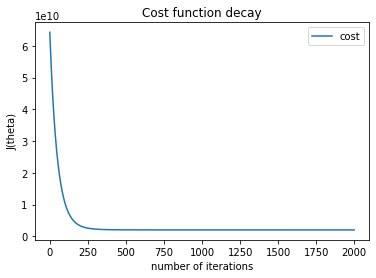

In [48]:
#The cost function against the number of iterations below
#note the quick convergence for about from 0 to 200 iterations
plt.plot(J_history, label='cost')
plt.xlabel('number of iterations')
plt.ylabel('J(theta)')
plt.title('Cost function decay')
plt.legend()

As before, we are in a position to make predictions. What is the
estimated price of a 1650 ft^2 house with 3 bedrooms ?

In [49]:
#As we normalized the features when fitting the model, we also need to 
#normalize the features used for any prediction.
X_test = np.array([1, 1650, 3 ])


X_test_norma = np.array([1, (X_test[1] -mu[0])/sigma[0] , (X_test[2] - mu[1])/sigma[1] ])


price = np.dot(X_test_norma.T, theta)

print('The estimated price of a House with 1650 ft^2 and 3 bedrooms is: ' + str(price[0]) + '$')

The estimated price of a House with 1650 ft^2 and 3 bedrooms is: 293083.73888660746$


#Exact solution (Normal equation)
For linear regression, an exact solution to the problem of finding the minimum of the cost function  can be found and it is called the normal equation.
As it involves the calculation of inverse matrices, the computational cost of the process grows with $\mathcal{O}(n^3)$, where $n$ is the number of examples.
That means the use of the normal equation shall be restricted to situations where the dataset is not very large, up to $10^3$ number of examples.
The solution is obtained by setting $\frac{\partial J}{\partial \theta} = 0$, as the quadratic function $J$ is convex and will have a global minimum rather than a maximum, which results in 
\begin{equation}
\theta = \left( X^t X \right)^{-1} X^t y,
\end{equation}
which indeed is a $(n+1) \times 1$ matrix.
Note there is no need for using the learning rate $\alpha$ or iterative steps. The learning rate is a consequence of using approximations to a numerical problem and it is absent in the case of exact solutions.

In [50]:
theta_min = np.linalg.inv(X.T @ X) @ X.T @ y

print(f'The weights that solve the problem exactly are \n {theta_min.flatten()}')

The weights that solve the problem exactly are 
 [340412.65957447 110631.05027885  -6649.47427082]


#Comparison with Scikit-learn


In [51]:
#If we use our initial x without normalization 
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(x, y)

LinearRegression()

In [52]:
x_test = np.array([[1650, 3]])
price_predicted = lr.predict(x_test)
price_predicted

#the prediction agress with what we found before

array([[293081.4643349]])

In [53]:
#But the values of the weights and bias are not the same. that is expected! 
print('weights are: ',lr.coef_)
print('intercept is: ',lr.intercept_)

weights are:  [[  139.21067402 -8738.01911233]]
intercept is:  [89597.9095428]


In [54]:
#Now, if we use our normalized features x_norma (before adding the bias)
lr2 = LinearRegression(fit_intercept=True)
lr2.fit(x_norma, y)

print('weights are: ',lr2.coef_)
print('intercept is: ',lr2.intercept_)

#same weights and bias we found before

weights are:  [[110631.05027885  -6649.47427082]]
intercept is:  [340412.65957447]
